<a href="https://colab.research.google.com/github/mikiya2014/My-projects/blob/main/Project1_Parametric_Statistics_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parametric Statistics and Modeling**

**Dataset:** Highway accidents per town from the Department of Transportation.

**Variables:** Geographic and weather-related data to help explain why there are different amounts of accidents on roads (GRID_ID) within Connecticut.

**Target:**
*   FlagAccident: binary flag to show whether an accident has happened or not 
*   CountAccident: the count of accidents that happened


## **Load Libraries**

In [ ]:
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

## **Load Dataset**

In [ ]:
#https://drive.google.com/file/d/1u1miC7fVZ_Y3GZII-Ois11ycLgsJZHDR/view?usp=sharing
import pandas as pd
from pandas import read_excel
url = "https://drive.google.com/uc?export=download&id=1u1miC7fVZ_Y3GZII-Ois11ycLgsJZHDR" 
dataframe = pd.read_csv(url, header = 0)
df = pd.DataFrame(dataframe)
df.head()

,GRID_ID,Region,SimStartDate,RoadLength,MAXTotPrec,MAXWStress,MAXGust,MAXSfcRoff,MAXWind10m,MAXSoilMst,MAXPotTemp,MAXPreRate,MAXSpecHum,MAXAbsVor,MAXTemp,MEANTotPrec,MEANWStress,MEANGust,MEANSfcRoff,MEANWind10m,MEANSoilMst,MEANPotTemp,MEANPreRate,MEANSpecHum,MEANAbsVor,MEANTemp,FlagAccident,CountAccident
0,4239,Hartford,StormA,162,96.1,1.46967,27.72049,14.4,11.12232,0.41258,304.39105,18.4,0.01686,1.22993,299.00842,94.25000,1.39121,26.24214,14.400,10.53907,0.38148,297.52719,5.350,0.01592,-0.37104,296.17722,1,25
1,4246,Hartford,StormA,110,98.8,1.54819,28.22049,15.4,12.06209,0.41558,303.34708,18.9,0.01686,1.01993,298.70844,96.27499,1.47992,26.64214,15.275,11.54480,0.38523,297.56494,5.950,0.01587,0.00396,295.96198,1,4
2,4252,Hartford,StormA,242,106.2,1.49169,27.92048,23.8,11.32097,0.42358,303.61807,19.8,0.01696,0.82993,298.71542,102.87500,1.42766,26.16714,23.375,10.80954,0.40048,297.54019,6.700,0.01587,0.65396,295.95947,1,1
3,4260,Hartford,StormA,164,114.6,1.35850,27.22049,26.1,10.31752,0.44558,304.04407,20.8,0.01706,0.69269,298.89944,110.55000,1.28987,25.49214,25.450,9.79056,0.42398,297.50446,7.400,0.01589,0.22896,296.12396,1,4
4,4333,Hartford,StormA,343,95.7,1.38905,27.52048,13.3,10.84527,0.41258,303.52606,17.3,0.01691,1.31993,298.89444,93.72500,1.29715,26.09214,13.275,10.13694,0.38173,297.58145,5.325,0.01597,-0.17104,296.23419,1,100


## **Delete Outlier**

In [ ]:
#optional deleting outlier above threshold
df = df.loc[(df['RoadLength'] < 1490)&(df['MEANWStress'] < 2.58)]
df.head()

,GRID_ID,Region,SimStartDate,RoadLength,MAXTotPrec,MAXWStress,MAXGust,MAXSfcRoff,MAXWind10m,MAXSoilMst,MAXPotTemp,MAXPreRate,MAXSpecHum,MAXAbsVor,MAXTemp,MEANTotPrec,MEANWStress,MEANGust,MEANSfcRoff,MEANWind10m,MEANSoilMst,MEANPotTemp,MEANPreRate,MEANSpecHum,MEANAbsVor,MEANTemp,FlagAccident,CountAccident
0,4239,Hartford,StormA,162,96.1,1.46967,27.72049,14.4,11.12232,0.41258,304.39105,18.4,0.01686,1.22993,299.00842,94.25000,1.39121,26.24214,14.400,10.53907,0.38148,297.52719,5.350,0.01592,-0.37104,296.17722,1,25
1,4246,Hartford,StormA,110,98.8,1.54819,28.22049,15.4,12.06209,0.41558,303.34708,18.9,0.01686,1.01993,298.70844,96.27499,1.47992,26.64214,15.275,11.54480,0.38523,297.56494,5.950,0.01587,0.00396,295.96198,1,4
2,4252,Hartford,StormA,242,106.2,1.49169,27.92048,23.8,11.32097,0.42358,303.61807,19.8,0.01696,0.82993,298.71542,102.87500,1.42766,26.16714,23.375,10.80954,0.40048,297.54019,6.700,0.01587,0.65396,295.95947,1,1
3,4260,Hartford,StormA,164,114.6,1.35850,27.22049,26.1,10.31752,0.44558,304.04407,20.8,0.01706,0.69269,298.89944,110.55000,1.28987,25.49214,25.450,9.79056,0.42398,297.50446,7.400,0.01589,0.22896,296.12396,1,4
4,4333,Hartford,StormA,343,95.7,1.38905,27.52048,13.3,10.84527,0.41258,303.52606,17.3,0.01691,1.31993,298.89444,93.72500,1.29715,26.09214,13.275,10.13694,0.38173,297.58145,5.325,0.01597,-0.17104,296.23419,1,100


## **Data Exploratory**

In [ ]:
df_num = df.drop(columns=['GRID_ID', 'Region', 'FlagAccident', 'CountAccident'])
df_num.head()
grouped_df_num = df_num.groupby(['SimStartDate'])
q1 = grouped_df_num.describe().stack()
q1

RoadLength   MAXTotPrec  ...   MEANAbsVor     MEANTemp
SimStartDate                                  ...                          
StormA       count  2850.000000  2850.000000  ...  2850.000000  2850.000000
             mean    123.893333   129.717263  ...     0.223387   295.418805
             std     120.350885    31.010980  ...     0.497730     1.243865
             min       1.000000    55.600000  ...    -2.521040   290.216920
             25%      48.000000   105.300000  ...    -0.021040   295.037457
             50%      84.000000   124.850000  ...     0.228960   295.686220
             75%     158.750000   153.399990  ...     0.478960   296.200497
             max     973.000000   226.200000  ...     2.946140   297.444090
StormB       count  2849.000000  2849.000000  ...  2849.000000  2849.000000
             mean    123.929449    28.596385  ...     0.072562   289.928573
             std     120.356564     9.719892  ...     0.622857     1.211799
             min       1.000000     8.800000  ...    -3.318350   285.574980
             25%      48.000000    21.800000  ...    -0.121450   289.192990
             50%      84.000000    26.900000  ...     0.106650   290.007660
             75%     159.000000    33.800000  ...     0.324530   290.915160
             max     973.000000    61.500000  ...     4.562550   292.096860

[16 rows x 23 columns]

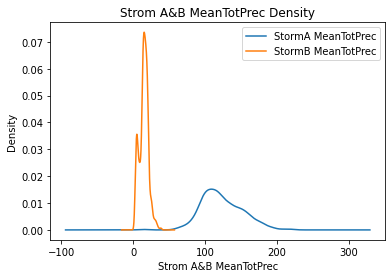

In [ ]:
#plot1
df_A = df[df['SimStartDate']=='StormA']
df_B = df[df['SimStartDate']=='StormB']

df_A.MEANTotPrec.plot(kind='kde')
df_B.MEANTotPrec.plot(kind='kde')
plt.xlabel('Strom A&B MeanTotPrec')
plt.title('Strom A&B MeanTotPrec Density')
plt.legend(('StormA MeanTotPrec','StormB MeanTotPrec'),loc='best')
plt.show()

#MeanTotPrecs of StromA and StromB are distributed differently.
#MeanTotprec of StormA mainly live the range of 100 to 150;
#MeanTotprec of StormB mainly live the range of 0 to 50.

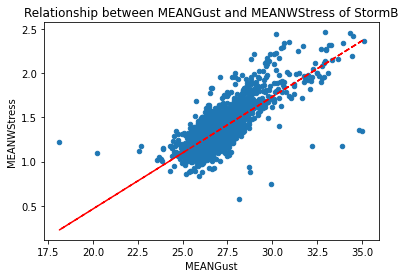

In [ ]:
#plot2
df_B.plot(x='MEANGust', y='MEANWStress', kind='scatter')

x = df_B.MEANGust
y = df_B.MEANWStress
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('Relationship between MEANGust and MEANWStress of StormB')
plt.show()

#The relationship between MEANGust and MEANWStress are positive,
#the more MEANGust, the more MEANStress.

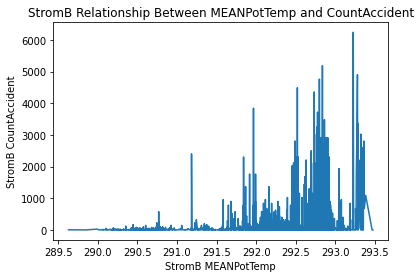

In [ ]:
#plot3
df_B_meanpottemp = df_B.sort_values('MEANPotTemp')
df_B_meanpottemp.head()
x = df_B_meanpottemp.MEANPotTemp
y = df_B_meanpottemp.CountAccident
plt.plot(x,y)

plt.xlabel('StromB MEANPotTemp')
plt.ylabel('StromB CountAccident')
plt.title('StromB Relationship Between MEANPotTemp and CountAccident')
plt.show()

#The general trend of this graph is positive,
#the more MEANPotTemp, the more CountAccident.

## **Hypothesis Testing**

In [ ]:
#!pip install scipy==1.2 --upgrade
#run the first line to downgrade scipy for using statsmodels
import statsmodels.api as sm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Proportion test

#Null Hypothesis = Fairfield Accidents Per - Hartford Accidents Per <= 0
#Alternative Hypothesis = Fairfield Accidents Per - Hartford Accidents Per > 0
#Significance level = 0.05
#Assumption: Since sample size is large, the sample is regarded nearly a normal distribution, we can use z-test


df_ff_1 = df.loc[(df['Region'] == 'Fairfield')&(df['FlagAccident'] == 1)]
n_ff_1 = df_ff_1.shape[0] #1114
df_ff_01 = df.loc[(df['Region'] == 'Fairfield')]
n_ff_01 = df_ff_01.shape[0]
n_ff_01 #1474
#1114 accidents are there in Fairfield out of 1474 records
#proportion is 1114/1474

df_hf_1 = df.loc[(df['Region'] == 'Hartford')&(df['FlagAccident'] == 1)]
n_hf_1 = df_hf_1.shape[0] #796
df_hf_01 = df.loc[(df['Region'] == 'Hartford')]
n_hf_01 = df_hf_01.shape[0]
n_hf_01 #1048
#796 accidents are there in Hartford out of 1048 records
#proportion is 796/1048

p_value = sm.stats.proportions_ztest([n_ff_1, n_hf_1], [n_ff_01, n_hf_01],alternative='larger')
p_value


#p-value = 0.41, which is larger than 0.05, cannot reject the null.
#Fairfield Accidents Per - Hartford Accidents Per <= 0, DO NOT have enough evidence that Fairfield have more accidents than Hartford.

(-0.2274651869223532, 0.5899689817157714)

In [ ]:
#Averages test

#Null Hypothesis = Average Fairfield Accidents <= Average Hartford Accidents
#Alternative Hypothesis = Average Fairfield Accidents > Average Hartford Accidents
#Assumption: Since sample size is large, the sample is regarded nearly a normal distribution, we can use z-test or t-test.
from scipy import stats

stats.ttest_ind(df_ff_01['CountAccident'], df_hf_01['CountAccident'], equal_var=False)

#p-value = 0.094, which is larger than 0.05, cannot reject the null.
#On average, DO NOT have enough evidence that Fairfield have more accidents than Hartford.

Ttest_indResult(statistic=-1.673361433380472, pvalue=0.09450115726648188)

## **Checking Out the Response Variable**

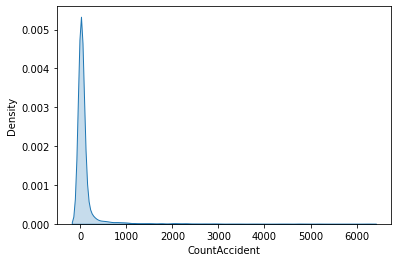

In [ ]:
#density plot
sns.kdeplot(df['CountAccident'], shade=True)

In [ ]:
#KS test to test the goodness of fit to a normal distribution
from scipy.stats import kstest
kstest(df['CountAccident'],'norm')

#p-value=0, it is not a normal distribution.
#It is a distribution skewed to the lower, small counts are dominating the variable values.

KstestResult(statistic=0.66131242421351, pvalue=0.0)

## **Data Preparation**

In [ ]:
#Standardize numeric data
from sklearn.preprocessing import MinMaxScaler
df_num2 = df_num.drop(columns = ['SimStartDate'])
x = df_num2
min_max_scaler = MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_minmax, columns=['RoadLength',	'MAXTotPrec',	'MAXWStress',	'MAXGust',	'MAXSfcRoff',	'MAXWind10m',	'MAXSoilMst',	'MAXPotTemp',	'MAXPreRate',	'MAXSpecHum',	'MAXAbsVor',	'MAXTemp',	'MEANTotPrec',	'MEANWStress',	'MEANGust',	'MEANSfcRoff',	'MEANWind10m',	'MEANSoilMst',	'MEANPotTemp',	'MEANPreRate',	'MEANSpecHum',	'MEANAbsVor',	'MEANTemp'])
df2[['GRID_ID', 'Region', 'SimStartDate', 'FlagAccident', 'CountAccident']] = df[['GRID_ID', 'Region', 'SimStartDate', 'FlagAccident', 'CountAccident']]
df2.head()

,RoadLength,MAXTotPrec,MAXWStress,MAXGust,MAXSfcRoff,MAXWind10m,MAXSoilMst,MAXPotTemp,MAXPreRate,MAXSpecHum,MAXAbsVor,MAXTemp,MEANTotPrec,MEANWStress,MEANGust,MEANSfcRoff,MEANWind10m,MEANSoilMst,MEANPotTemp,MEANPreRate,MEANSpecHum,MEANAbsVor,MEANTemp,GRID_ID,Region,SimStartDate,FlagAccident,CountAccident
0,0.165638,0.401564,0.400747,0.443257,0.214286,0.220627,0.186214,0.697851,0.454787,0.760192,0.258344,0.905209,0.415659,0.424658,0.586686,0.214286,0.236192,0.167624,0.727874,0.240449,0.841553,0.373981,0.893263,4239.0,Hartford,StormA,1.0,25.0
1,0.112140,0.413983,0.437586,0.471834,0.229167,0.261681,0.190366,0.637753,0.468085,0.760192,0.222975,0.879697,0.424811,0.470974,0.605350,0.227307,0.282599,0.172670,0.731354,0.267416,0.836306,0.421565,0.875129,4246.0,Hartford,StormA,1.0,4.0
2,0.247942,0.448022,0.411078,0.454687,0.354167,0.229305,0.201440,0.653353,0.492021,0.772182,0.190975,0.880290,0.454638,0.443689,0.583186,0.347842,0.248672,0.193191,0.729073,0.301124,0.836306,0.504043,0.874917,4252.0,Hartford,StormA,1.0,1.0
3,0.167695,0.486661,0.348589,0.414681,0.388393,0.185470,0.231891,0.677876,0.518617,0.784173,0.167861,0.895941,0.489323,0.371748,0.551689,0.378720,0.201655,0.224813,0.725779,0.332584,0.838405,0.450115,0.888776,4260.0,Hartford,StormA,1.0,4.0
4,0.351852,0.399724,0.362922,0.431826,0.197917,0.208524,0.186214,0.648056,0.425532,0.766187,0.273502,0.895515,0.413287,0.375549,0.579686,0.197545,0.217637,0.167961,0.732877,0.239326,0.846800,0.399359,0.898063,4333.0,Hartford,StormA,1.0,100.0


In [ ]:
random.seed(123)
from sklearn.utils import shuffle
df2 = shuffle(df2)
#df2.head()

In [ ]:
#Benefit:
#1. Eliminating the negative impact of different dimensions of variables.
#2. Decreasing bad impact of Singular data.
#3. Improving the model performance.

In [ ]:
#Unstandardized Coefficients represents the "absolute impact" of each variable, 
#which shows the effect of different variables. 

#Standardization make variables become comparable. And the Standardized Coefficients represents
#the "comparable impact", which shows the importance of different variables.

## **Modeling**

### **Model 1 Logistic Regression**

In [ ]:
from patsy import dmatrices

formula = """FlagAccident ~ RoadLength+MAXTotPrec+MAXWStress+MAXGust+MAXSfcRoff+MAXWind10m+MAXSoilMst+MAXPotTemp+MAXPreRate+MAXSpecHum+MAXAbsVor+MAXTemp+MEANTotPrec+MEANWStress+MEANGust+MEANSfcRoff+MEANWind10m+MEANSoilMst+MEANPotTemp+MEANPreRate+MEANSpecHum+MEANAbsVor+MEANTemp"""
response, predictors = dmatrices(formula, df2, return_type='dataframe')
reg_results = sm.GLM(response, predictors, family=sm.families.Binomial()).fit()
print(reg_results.summary())
#Significant variables are RoadLength,MAXPotTemp,MAXSpecHum,MAXTemp,MEANGust,MEANPotTemp,MEANTemp
formula_par="""FlagAccident ~ RoadLength+MAXPotTemp+MAXSpecHum+MAXTemp+MEANGust+MEANPotTemp+MEANTemp"""
response_par, predictors_par = dmatrices(formula_par, df2, return_type='dataframe')
reg_results_par = sm.GLM(response_par, predictors_par, family=sm.families.Binomial()).fit()
print(reg_results_par.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           FlagAccident   No. Observations:                 5696
Model:                            GLM   Df Residuals:                     5672
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2370.5
Date:                Sat, 06 Feb 2021   Deviance:                       4741.1
Time:                        22:15:52   Pearson chi2:                 3.75e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.6147      0.581     -2.779      

In [ ]:
#Logistic regression with Logit function
df2=df2[pd.notnull(df2['FlagAccident'])]
logit=sm.Logit(df2['FlagAccident'].astype(np.int),df2[['RoadLength',	'MAXTotPrec',	'MAXWStress',	'MAXGust',	'MAXSfcRoff',	'MAXWind10m',	'MAXSoilMst',	'MAXPotTemp',	'MAXPreRate',	'MAXSpecHum',	'MAXAbsVor',	'MAXTemp',	'MEANTotPrec',	'MEANWStress',	'MEANGust',	'MEANSfcRoff',	'MEANWind10m',	'MEANSoilMst',	'MEANPotTemp',	'MEANPreRate',	'MEANSpecHum',	'MEANAbsVor',	'MEANTemp']].astype(np.float32))
log_result=logit.fit()
log_result.summary()
#Threshold is p-value=0.05.
#Significant variables are RoadLength,MAXPotTemp,MAXPreRate,MAXSpecHum,MAXTemp,MEANGust,MEANPotTemp,MEANSpecHum,MEANTemp
logit_par1=sm.Logit(df2['FlagAccident'].astype(np.int),df2[['RoadLength','MAXPotTemp','MAXPreRate','MAXSpecHum','MAXTemp','MEANGust','MEANPotTemp','MEANSpecHum','MEANTemp']].astype(np.float32))
log_result_par1=logit_par1.fit()
log_result_par1.summary()
#MAXPreRate is not significant.
logit_par2=sm.Logit(df2['FlagAccident'].astype(np.int),df2[['RoadLength','MAXPotTemp','MAXSpecHum','MAXTemp','MEANGust','MEANPotTemp','MEANSpecHum','MEANTemp']].astype(np.float32))
log_result_par2=logit_par2.fit()
log_result_par2.summary()
#All variables remained are significant, results very similar with the other method.

Optimization terminated successfully.
         Current function value: 0.416856
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.420498
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.420777
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           FlagAccident   No. Observations:                 5696
Model:                          Logit   Df Residuals:                     5688
Method:                           MLE   Df Model:                            7
Date:                Sat, 06 Feb 2021   Pseudo R-squ.:                  0.1322
Time:                        22:15:53   Log-Likelihood:                -2396.7
converged:                       True   LL-Null:                       -2761.9
Covariance Type:            nonrobust   LLR p-value:                1.988e-153
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
RoadLength     12.0138      0.678     17.713      0.000      10.684      13.343
MAXPotTemp     -2.4147      0.782     -3.089      0.002      -3.947      -0.883
MAXSpecHum      5.3929      0.704      7.657      0.000       4.012       6.773
MAXTemp        -6.1759      1.064     -5.805      0.000      -8.261      -4.091
MEANGust        0.6553      0.204      3.208      0.001       0.255       1.056
MEANPotTemp    -4.4355      0.839     -5.285      0.000      -6.080      -2.791
MEANSpecHum     4.2147      0.760      5.545      0.000       2.725       5.705
MEANTemp        3.2577      0.767      4.247      0.000       1.754       4.761
===============================================================================
"""

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  
log_predicted = log_result_par2.predict()
y_true=df2['FlagAccident']
y_pred=log_predicted
#error matrix calculation
mae=mean_absolute_error(y_true, y_pred)
#mape=mean_absolute_percentage_error(y_true, y_pred)
rmse=sqrt(mean_squared_error(y_true, y_pred))
print(mae,rmse)
#confusion matrix calculation
predicted_choice = (log_predicted > 0.5).astype(int)
# predicted_1=len(predicted_choice[predicted_choice==1])
# predicted_0=len(predicted_choice[predicted_choice==0])

#condition positive (P):the number of real positive cases in the data
#condition negative (N):the number of real negative cases in the data
#tpr=tp/p; tnr=tn/n; fpr=fp/n; fnr=fn/p
tn, fp, fn, tp = confusion_matrix(y_true, predicted_choice).ravel()
print(tp,tn,fp,fn)
actual_1=len(df2['FlagAccident'][df2['FlagAccident']==1.0])
actual_0=len(df2['FlagAccident'][df2['FlagAccident']==0.0])
tpr=tp/actual_1
fpr=fp/actual_0
tnr=tn/actual_0
fnr=fn/actual_1
overall=(tp+tn)/5696
print(tpr,tnr,fpr,fnr,overall)

0.26731107841748447 0.3635414472893243
4583 43 1034 36
0.9922061052175796 0.039925719591457756 0.9600742804085423 0.0077938947824204375 0.8121488764044944


### **Model 2 Poisson Regression**

In [ ]:
from patsy import dmatrices

formula = """CountAccident ~ RoadLength+MAXTotPrec+MAXWStress+MAXGust+MAXSfcRoff+MAXWind10m+MAXSoilMst+MAXPotTemp+MAXPreRate+MAXSpecHum+MAXAbsVor+MAXTemp+MEANTotPrec+MEANWStress+MEANGust+MEANSfcRoff+MEANWind10m+MEANSoilMst+MEANPotTemp+MEANPreRate+MEANSpecHum+MEANAbsVor+MEANTemp"""
response, predictors = dmatrices(formula, df2, return_type='dataframe')
poi_results = sm.GLM(response, predictors, family=sm.families.Poisson()).fit()
print(poi_results.summary())
#All of the variables are significant from the resulted summary.


                 Generalized Linear Model Regression Results                  
Dep. Variable:          CountAccident   No. Observations:                 5696
Model:                            GLM   Df Residuals:                     5672
Model Family:                 Poisson   Df Model:                           23
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.9805e+05
Date:                Sat, 06 Feb 2021   Deviance:                   9.7464e+05
Time:                        22:15:53   Pearson chi2:                 2.66e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7022      0.023    115.546      

### **Model3: Ensemble Model of Model1&2**

92.53919373367144 318.61612836536443


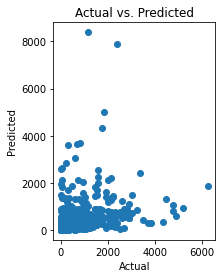

In [ ]:
poi_predicted = poi_results.predict()
ensemble_pred=log_predicted*poi_predicted
ensemble_true=df2['FlagAccident']*df2['CountAccident']
#error matrix calculation
en_mae=mean_absolute_error(ensemble_true, ensemble_pred)
#en_mape=mean_absolute_percentage_error(ensemble_true, ensemble_pred)
en_rmse=sqrt(mean_squared_error(ensemble_true, ensemble_pred))
print(en_mae,en_rmse)
#plot of actual vs. predicted
plt.scatter(ensemble_true, ensemble_pred)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.axis('scaled')
plt.show()

# **Analysis1**




In [ ]:
#In the Logit Regression, comparing the coefficents, RoadLength exerts the most impact on Flagaccident and MAXGust exerts the least before eliminate any variable.
#After eliminate insignificant variables, RoadLength still has the most impact while MeanGust has the least.
#Significant variables are RoadLength,MAXPotTemp,MAXSpecHum,MAXTemp,MEANGust,MEANPotTemp,MEANTemp with a 0.05 threshold.
#Besides, MaxTemp,MAXSpecHum and MEANPotTemp also have great impact on the reponse while all other variables have less impact on the response.
#Also the logistic regression coefficients are log odds and the sample was standardized in Q4, the impact of interpretion scale was reduced.
#As a result, interpretation of the coeffients become more effective for comparable impact between variables but the scale was reduced led to in reality 
#a bigger difference between the impact of variables. Which means variables with larger coefficients have even more impact on the response.

#In the Poisson Regression, comparing the coefficents, MAXWind10m exerts the largest impact on Flagaccident and MEANSpecHum exerts the least.
#Besides, the MAXWStress and MEANWind10m also have a great impact on Flagaccident. On the contrary, the MEANGust and the MAXGust has less influence on the response.

#The ensemble model combines these two level models and returns the final predicted probability of how serious of certain criteria can lead to accidents. 

#These models can be interpreted as that the The longer the road, the more the possibility of a vehicle having accident and the number of peak of Gust has less effect on the results.
#And the WStress and the Wind10m mainly determine whether the accident happened and how many accident happend.

## **Model4: Random Forest Model**

In [ ]:
df3=df2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn
#Split data as StormA and StormB
df3_A = df3[df3['SimStartDate']=='StormA'].reset_index(drop=True)
df3_B = df3[df3['SimStartDate']=='StormB'].reset_index(drop=True)

#Define variables and response
feature_cols = ['RoadLength',	'MAXTotPrec',	'MAXWStress',	'MAXGust',	'MAXSfcRoff',	'MAXWind10m',	'MAXSoilMst',	'MAXPotTemp',	'MAXPreRate',	'MAXSpecHum',	'MAXAbsVor',	'MAXTemp',	'MEANTotPrec',	'MEANWStress',	'MEANGust',	'MEANSfcRoff',	'MEANWind10m',	'MEANSoilMst',	'MEANPotTemp',	'MEANPreRate',	'MEANSpecHum',	'MEANAbsVor',	'MEANTemp']
Xa = df3_A[feature_cols]
Xa=Xa.values
Ya = df3_A.FlagAccident
Ya=Ya.values

Xb = df3_B[feature_cols]
Xb=Xb.values
Yb = df3_B.FlagAccident
Yb=Yb.values
base_model=RandomForestClassifier(n_estimators=100)
base_model.fit(Xa,Ya)
base_pred=base_model.predict(Xb)
total_accuracy=sklearn.metrics.accuracy_score(Yb,base_pred)
total_accuracy

0.7730147575544624

### **k-fold Cross-Validation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn
#Fit model on StormA and calculate error metrics
e_metrics=[]

#5-fold
kf = KFold(n_splits=5) 

for train_index, test_index in kf.split(Xa):
  
    X_train, X_test = Xa[train_index], Xa[test_index]
    y_train, y_test = Ya[train_index], Ya[test_index]
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train,y_train)
    pred_test=model.predict(X_test)
    total_accuracy=sklearn.metrics.accuracy_score(y_test,pred_test)
    
    #calculate error metrics
    #tpr=tp/p; tnr=tn/n; fpr=fp/n; fnr=fn/p
    a_tn, a_fp, a_fn, a_tp = confusion_matrix(y_test,pred_test).ravel()
    a_actual_1=len(y_test[y_test==1])
    a_actual_0=len(y_test[y_test==0])
    a_tpr=a_tp/a_actual_1
    a_fpr=a_fp/a_actual_0
    a_tnr=a_tn/a_actual_0
    a_fnr=a_fn/a_actual_1
    e_metrics.append([total_accuracy,a_tpr,a_tnr,a_fpr,a_fnr])
e_metrics

[[0.8280701754385965,
  0.9804347826086957,
  0.19090909090909092,
  0.8090909090909091,
  0.01956521739130435],
 [0.868421052631579,
  0.9721669980119284,
  0.08955223880597014,
  0.9104477611940298,
  0.027833001988071572],
 [0.8964912280701754,
  0.9900793650793651,
  0.18181818181818182,
  0.8181818181818182,
  0.00992063492063492],
 [0.8771929824561403,
  0.96875,
  0.06896551724137931,
  0.9310344827586207,
  0.03125],
 [0.6824561403508772,
  0.8494897959183674,
  0.3146067415730337,
  0.6853932584269663,
  0.15051020408163265]]

In [ ]:
from sklearn.metrics import confusion_matrix

#Validate on StormB by taking variable values of StormB into the model and get predicted values

#For predict 5 times
b_pred=cross_val_predict(model, Xb, Yb, cv=5)
#Overall accuracy
b_accuracy = accuracy_score(Yb, b_pred)

#confusion matrix
#tpr=tp/p; tnr=tn/n; fpr=fp/n; fnr=fn/p
b_tn, b_fp, b_fn, b_tp = confusion_matrix(Yb, b_pred).ravel()
b_actual_1=len(Yb[Yb==1.0])
b_actual_0=len(Yb[Yb==0.0])
b_tpr=b_tp/b_actual_1
b_fpr=b_fp/b_actual_0
b_tnr=b_tn/b_actual_0
b_fnr=b_fn/b_actual_1
e_metrics.append([b_accuracy,b_tpr,b_tnr,b_fpr,b_fnr])

table=pd.DataFrame(e_metrics, columns = ['Total Accuracy','TPR','TNR','FPR','FNR'])
table['index']=['StormA Fold1','StormA Fold2','StormA Fold3','StormA Fold4','StormA Fold5','Validate on StormB']
table.set_index('index',inplace=True)
table


,Total Accuracy,TPR,TNR,FPR,FNR
index,,,,,
StormA Fold1,0.828070,0.980435,0.190909,0.809091,0.019565
StormA Fold2,0.868421,0.972167,0.089552,0.910448,0.027833
StormA Fold3,0.896491,0.990079,0.181818,0.818182,0.009921
StormA Fold4,0.877193,0.968750,0.068966,0.931034,0.031250
StormA Fold5,0.682456,0.849490,0.314607,0.685393,0.150510
Validate on StormB,0.707660,0.806940,0.334448,0.665552,0.193060


### **Repeated k-fold Cross-Validation**

In [ ]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=2652124)
e_metrics=[]

for train_index, test_index in rkf.split(Xa):
  
    X_train, X_test = Xa[train_index], Xa[test_index]
    y_train, y_test = Ya[train_index], Ya[test_index]
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train,y_train)
    pred_test=model.predict(X_test)
    total_accuracy=sklearn.metrics.accuracy_score(y_test,pred_test)
    
    #calculate error metrics
    #tpr=tp/p; tnr=tn/n; fpr=fp/n; fnr=fn/p
    a_tn, a_fp, a_fn, a_tp = confusion_matrix(y_test,pred_test).ravel()
    a_actual_1=len(y_test[y_test==1])
    a_actual_0=len(y_test[y_test==0])
    a_tpr=a_tp/a_actual_1
    a_fpr=a_fp/a_actual_0
    a_tnr=a_tn/a_actual_0
    a_fnr=a_fn/a_actual_1
    e_metrics.append([total_accuracy,a_tpr,a_tnr,a_fpr,a_fnr])
e_metrics

[[0.8122807017543859,
  0.9308176100628931,
  0.20430107526881722,
  0.7956989247311828,
  0.06918238993710692],
 [0.8385964912280702,
  0.9559748427672956,
  0.23655913978494625,
  0.7634408602150538,
  0.0440251572327044],
 [0.8333333333333334,
  0.9639065817409767,
  0.21212121212121213,
  0.7878787878787878,
  0.036093418259023353],
 [0.8280701754385965,
  0.9457202505219207,
  0.2087912087912088,
  0.7912087912087912,
  0.054279749478079335],
 [0.8333333333333334,
  0.961456102783726,
  0.2524271844660194,
  0.7475728155339806,
  0.03854389721627409],
 [0.8122807017543859, 0.9375, 0.14444444444444443, 0.8555555555555555, 0.0625],
 [0.8157894736842105,
  0.954248366013072,
  0.24324324324324326,
  0.7567567567567568,
  0.0457516339869281],
 [0.8175438596491228,
  0.9487179487179487,
  0.21568627450980393,
  0.7843137254901961,
  0.05128205128205128],
 [0.8403508771929824,
  0.9486652977412731,
  0.20481927710843373,
  0.7951807228915663,
  0.0513347022587269],
 [0.8210526315789474,

In [ ]:
b_pred = model.predict(Xb)
b_accuracy = accuracy_score(Yb, b_pred)
#confusion matrix
#tpr=tp/p; tnr=tn/n; fpr=fp/n; fnr=fn/p
b_tn, b_fp, b_fn, b_tp = confusion_matrix(Yb, b_pred).ravel()
b_actual_1=len(Yb[Yb==1.0])
b_actual_0=len(Yb[Yb==0.0])
b_tpr=b_tp/b_actual_1
b_fpr=b_fp/b_actual_0
b_tnr=b_tn/b_actual_0
b_fnr=b_fn/b_actual_1
print(b_accuracy,b_tpr,b_tnr,b_fpr,b_fnr)
e_metrics.append([b_accuracy,b_tpr,b_tnr,b_fpr,b_fnr])
table=pd.DataFrame(e_metrics, columns = ['Total Accuracy','TPR','TNR','FPR','FNR'])
table=table.rename({50:'Validate on StormB'})
table
table.iloc[0:50].describe()

0.7572030920590302 0.9079181494661922 0.19063545150501673 0.8093645484949833 0.09208185053380782


,Total Accuracy,TPR,TNR,FPR,FNR
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.827754,0.954021,0.203619,0.796381,0.045979
std,0.012744,0.011399,0.033464,0.033464,0.011399
min,0.794737,0.930818,0.117021,0.732558,0.023810
25%,0.819298,0.946238,0.188125,0.777158,0.036645
50%,0.829825,0.954790,0.207108,0.792892,0.045210
75%,0.835965,0.963355,0.222842,0.811875,0.053762
max,0.864912,0.976190,0.267442,0.882979,0.069182


### **Balanced the Sample with k-fold Cross-Validation**

In [ ]:
#data1,data2 and data3
df3_A_0 = df3_A.loc[df3_A['FlagAccident'] == 0]
data1 = df3_A_0

df3_A_1 = df3_A.loc[df3_A['FlagAccident'] == 1]
df3_A_1_rdm = df3_A_1.sample(n=len(data1))
data2 = df3_A_1_rdm

frames = [data1, data2]
data3 = pd.concat(frames)
data3 = shuffle(data3)
data3.head()


,RoadLength,MAXTotPrec,MAXWStress,MAXGust,MAXSfcRoff,MAXWind10m,MAXSoilMst,MAXPotTemp,MAXPreRate,MAXSpecHum,MAXAbsVor,MAXTemp,MEANTotPrec,MEANWStress,MEANGust,MEANSfcRoff,MEANWind10m,MEANSoilMst,MEANPotTemp,MEANPreRate,MEANSpecHum,MEANAbsVor,MEANTemp,GRID_ID,Region,SimStartDate,FlagAccident,CountAccident
1590,0.011317,0.505520,0.311891,0.343317,0.297619,0.158825,0.205841,0.684554,0.566489,0.737410,0.136030,0.747448,0.521975,0.336772,0.519112,0.297619,0.177469,0.152392,0.772214,0.103371,0.799580,0.480473,0.804704,5773.0,Willimantic,StormA,0.0,0.0
2842,0.002058,0.979301,0.470100,0.295154,0.983631,0.271163,0.207751,0.651108,0.710106,0.697842,0.369503,0.607035,0.989719,0.478575,0.468560,0.983631,0.275043,0.110233,0.393131,0.002247,0.242392,0.541323,0.478992,6275.0,Fairfield,StormA,0.0,0.0
2234,0.128601,0.675713,0.350283,0.260369,0.546131,0.183131,0.208360,0.682021,0.614362,0.743405,0.228028,0.758759,0.608519,0.320514,0.400657,0.470238,0.164538,0.205517,0.857516,0.665169,0.883526,0.513764,0.826947,3627.0,Fairfield,StormA,1.0,484.0
867,0.095679,0.522539,0.396384,0.431826,0.409226,0.218495,0.187847,0.713740,0.468085,0.760192,0.105827,0.811148,0.540391,0.415083,0.573854,0.409226,0.229035,0.155514,0.764310,0.179775,0.816369,0.393015,0.822132,3284.0,Willimantic,StormA,1.0,16.0
60,0.109053,0.551978,0.373141,0.431826,0.348214,0.201901,0.214105,0.701593,0.670213,0.749400,0.250991,0.800348,0.557903,0.398177,0.583186,0.346354,0.218259,0.174352,0.778000,0.261798,0.823715,0.548454,0.832791,4851.0,Hartford,StormA,1.0,1.0


In [ ]:
feature_cols = ['RoadLength',	'MAXTotPrec',	'MAXWStress',	'MAXGust',	'MAXSfcRoff',	'MAXWind10m',	'MAXSoilMst',	'MAXPotTemp',	'MAXPreRate',	'MAXSpecHum',	'MAXAbsVor',	'MAXTemp',	'MEANTotPrec',	'MEANWStress',	'MEANGust',	'MEANSfcRoff',	'MEANWind10m',	'MEANSoilMst',	'MEANPotTemp',	'MEANPreRate',	'MEANSpecHum',	'MEANAbsVor',	'MEANTemp']
Xa_q4 = data3[feature_cols]
Xa_q4=Xa_q4.values
ya_q4 = data3.FlagAccident
ya_q4=ya_q4.values
Xb_q4 = df3_B[feature_cols]
Xb_q4=Xb_q4.values
yb_q4 = df3_B.FlagAccident
yb_q4=yb_q4.values

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

cv = KFold(n_splits=5)
e_metrics=[]

for train_index, test_index in cv.split(Xa_q4):
    X_train, X_test = Xa_q4[train_index], Xa_q4[test_index]
    y_train, y_test = ya_q4[train_index], ya_q4[test_index]
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train,y_train)
    pred_test=model.predict(X_test)
    total_accuracy=sklearn.metrics.accuracy_score(y_test,pred_test)
    
    #calculate error metrics
    #tpr=tp/p; tnr=tn/n; fpr=fp/n; fnr=fn/p
    a_tn, a_fp, a_fn, a_tp = confusion_matrix(y_test,pred_test).ravel()
    a_actual_1=len(y_test[y_test==1])
    a_actual_0=len(y_test[y_test==0])
    a_tpr=a_tp/a_actual_1
    a_fpr=a_fp/a_actual_0
    a_tnr=a_tn/a_actual_0
    a_fnr=a_fn/a_actual_1
    e_metrics.append([total_accuracy,a_tpr,a_tnr,a_fpr,a_fnr])
e_metrics

[[0.7760416666666666,
  0.7254901960784313,
  0.8333333333333334,
  0.16666666666666666,
  0.27450980392156865],
 [0.7604166666666666,
  0.7777777777777778,
  0.7419354838709677,
  0.25806451612903225,
  0.2222222222222222],
 [0.7239583333333334,
  0.6631578947368421,
  0.7835051546391752,
  0.21649484536082475,
  0.3368421052631579],
 [0.6910994764397905,
  0.6666666666666666,
  0.7128712871287128,
  0.2871287128712871,
  0.3333333333333333],
 [0.7643979057591623,
  0.7526881720430108,
  0.7755102040816326,
  0.22448979591836735,
  0.24731182795698925]]

In [ ]:
#Validate on StormB by taking variable values of StormB into the model and get predicted values

#For predict 5 times
b_pred=cross_val_predict(model, Xb_q4, yb_q4, cv=5)
#Overall accuracy
b_accuracy = accuracy_score(yb_q4, b_pred)

#confusion matrix
#tpr=tp/p; tnr=tn/n; fpr=fp/n; fnr=fn/p
b_tn, b_fp, b_fn, b_tp = confusion_matrix(yb_q4, b_pred).ravel()
b_actual_1=len(yb_q4[yb_q4==1.0])
b_actual_0=len(yb_q4[yb_q4==0.0])
b_tpr=b_tp/b_actual_1
b_fpr=b_fp/b_actual_0
b_tnr=b_tn/b_actual_0
b_fnr=b_fn/b_actual_1
e_metrics.append([b_accuracy,b_tpr,b_tnr,b_fpr,b_fnr])

table=pd.DataFrame(e_metrics, columns = ['Total Accuracy','TPR','TNR','FPR','FNR'])
table['index']=['StormA Fold1','StormA Fold2','StormA Fold3','StormA Fold4','StormA Fold5','Validate on StormB']
table.set_index('index',inplace=True)
table

,Total Accuracy,TPR,TNR,FPR,FNR
index,,,,,
StormA Fold1,0.776042,0.725490,0.833333,0.166667,0.274510
StormA Fold2,0.760417,0.777778,0.741935,0.258065,0.222222
StormA Fold3,0.723958,0.663158,0.783505,0.216495,0.336842
StormA Fold4,0.691099,0.666667,0.712871,0.287129,0.333333
StormA Fold5,0.764398,0.752688,0.775510,0.224490,0.247312
Validate on StormB,0.699227,0.796708,0.332776,0.667224,0.203292


## **Analysis2**

In [ ]:
#Results tables

#5-fold

	               Total Accuracy	 TPR	     TNR	     FPR	     FNR				
      StormA Fold1	0.865149	0.957983	0.400000	0.600000	0.042017
      StormA Fold2	0.854386	0.965957	0.330000	0.670000	0.034043
      StormA Fold3	0.863158	0.957627	0.408163	0.591837	0.042373
      StormA Fold4	0.856140	0.946170	0.356322	0.643678	0.053830
      StormA Fold5	0.847368	0.949045	0.363636	0.636364	0.050955
Validate on StormB	0.820765	0.945382	0.352254	0.647746	0.054618

#10 repeated 5-fold
#summary for 50 training
	     Total Accuracy	 TPR	    TNR	     FPR	      FNR
    mean	0.849735	0.952088	0.343971	0.656029	0.047912
    min	  0.805263	0.922269	0.256098	0.577778	0.021231
    max	  0.878947	0.978769	0.422222	0.743902	0.077731

Validate 	0.814100	0.967584	0.237062	0.762938	0.032416
on StormB

#Balanced 5-fold

                Total Accuracy	TPR	       TNR	     FPR	     FNR				
       StormA Fold1	0.713542	0.639175	0.789474	0.210526	0.360825
       StormA Fold2	0.765625	0.764151	0.767442	0.232558	0.235849
       StormA Fold3	0.729167	0.712871	0.747253	0.252747	0.287129
       StormA Fold4	0.764398	0.755814	0.771429	0.228571	0.244186
       StormA Fold5	0.774869	0.808989	0.745098	0.254902	0.191011
Validate on StormB	0.826026	0.947158	0.370618	0.629382	0.052842

#How the validation strategy affects the results?

#By comparing the results above for both training and validation of each model,

#The accuracy of 5-fold cross validation is around 0.82, that of repeated 5-fold cross validation is around 0.81, 

#and that of balanced 5-fold cross validation is around 0.82 on validation.

#Repeated 5-fold had the worst result since it is a much larger sample space for training

#and the result is overfitting to the training( May because our validation is on StormB but not the test partition for StormA). 

#Balanced 5-fold is probably a better model since the validation has higher accuracy than the training and 

#it is more adapted to be used in the real world. 

#TPR of all models are quite high, if our model is focusing on finding a '1' then our model performs really well.

#Both k-fold cross validation and repeated k-fold cross validation will enhance the accuracy of 

#random forest classification. And cross validation can make full use of limited data to build up an 

#appropriate model, which prevent of overfitting.

#What are the pros and cons of each validation strategy?

#K-fold cross validation

#Pros:

#1. Prevent underfitting or overfitting

#2. Good for small data set because it can strach the data and provide better results.

#3. Gives more accurate estimates of the test error rate 

#Cons: 

#1. Potential of heavy computation for large dataset.

#Balanced sample K-fold cross validation

#Pros: Avoid useless model when rare events are in the sample and fit a meaningful model that can be used in the real world.

#Cons: Resulting lower accuracies for the training partition.


#How are the models fitting?

#The accuracy of k-fold cross validation is 0.82.

#The accuracy of repeated k-fold cross validation is 0.81.

#The accuracy of model without cross validation is 0.70.

#The accuracy of balanced the sample with k-fold cross validation is 0.82.


#Are certain regions predicted better than others?

#TPR predicted much better than other metrics which is good for the model since most of the time we want to focus on 

#'Yes' prediction.